In [183]:
import tweepy
import pandas as pd
import numpy as np      # For number computing
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup_tweepy():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [185]:
def twitter_setup_twiter():
    return twitter.Api(consumer_key=CONSUMER_KEY,
                      consumer_secret=CONSUMER_SECRET,
                      access_token_key=ACCESS_TOKEN,
                      access_token_secret=ACCESS_SECRET)

In [186]:
# perprocess tweet text data
def preprocess_tweet(tweet):
    # Remove URLs 
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', tweet)
    # Remove @handle
    tweet = re.sub(r'@[\S]+', '', tweet)
    # Remove #hashtag with 
    tweet = re.sub(r'#(\S+)', '', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    return tweet


In [187]:
# how to get credentials for twitter API
# 
# create file credentials.py with following details

# Consume:
#CONSUMER_KEY    = ''
#CONSUMER_SECRET = ''

# Access:
#ACCESS_TOKEN  = ''
#ACCESS_SECRET = ''

In [188]:
# setup twitter api 
import pprint
api = twitter_setup_tweepy()
tweets = api.search(q='apple', count=200, lang="en", tweet_mode='extended')

def getTextFromTweet(tweet1):
    if 'retweeted_status' in tweet1._json:
        return tweet1._json["retweeted_status"]["full_text"]
    else:
        return tweet1._json["full_text"]
        
        
data = pd.DataFrame(data=[preprocess_tweet(getTextFromTweet(tweet)) for tweet in tweets], columns=['Tweets'])


display(data.head(3))

,Tweets
0,Dude. You don't even know the difference betwe...
1,Get to know e53rbody and plant that stadium a ...
2,"Although my devices are all Apple, I cannot de..."


In [189]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analize_sentiment_nltk(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis_nltk = sid.polarity_scores(tweet)

    return analysis_nltk
    

def getLabelfromPolarity(nltk_polarity):
    '''
    generate label 
    1 positive, 0 neutral, -1 negative
    :return: 
    '''
    res = max(nltk_polarity, key=nltk_polarity.get)
    #if nltk_polarity["neu"]== 1.0:
    #    return 0
    #elif nltk_polarity["pos"] > nltk_polarity["neg"]:
    #    return 1
    #else:
    #    return -1
    if res == "pos":
     return 1
    elif res == "neu":
     return 0
    else:
     return -1


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kgondaliya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [190]:
## twitter analysis using TextBlob
from textblob import TextBlob
def analize_sentiment_textblob(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0.1:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [191]:
# We create a column with the result of the analysis:
data['SAtxtblob'] = np.array([ analize_sentiment_textblob(tweet) for tweet in data['Tweets'] ])

# We create a column with the result of the analysis:
data['SAnltkPol'] = np.array([ analize_sentiment_nltk(tweet) for tweet in data['Tweets'] ])

# We create a column with the result of the analysis:
data['SAnltk'] = np.array([ getLabelfromPolarity(nltkpol) for nltkpol in data['SAnltkPol'] ])

data.to_csv("SA1.csv", sep=";")
# We construct lists with classified tweets:
#pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SATB'][index] > 0]
#neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SATB'][index] == 0]
#neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SATB'][index] < 0]


In [195]:
print(data.loc[data['SAtxtblob']!=data['SAnltk']].shape)
print(data.loc[data['SAtxtblob']==data['SAnltk']].shape)
data.head(5)

#display(data.loc[data['SATB']!=data['SANLTK']])
#print(data.loc[2,"Tweets"])

(44, 4)
(33, 4)


,Tweets,SAtxtblob,SAnltkPol,SAnltk
0,Dude. You don't even know the difference betwe...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
1,Get to know e53rbody and plant that stadium a ...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
2,"Although my devices are all Apple, I cannot de...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
3,“Give me some sugar baby!!” 💋💋 Listen to the ‘...,1,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0
4,I bought a mini many years back. My pogo stick...,1,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",-1


In [196]:
# join tweets to a single string
words = ' '.join(data['Tweets'])
print(words)

Dude. You don't even know the difference between oranges and origins. Or Tim Apple and Tim Cook. Or where your own DAD was born. Why should anybody believe YOU over guys who are trained their whole lives to remember the tiniest details and take extemporaneous notes? SMDH. Get to know e53rbody and plant that stadium a hunnid apple bales Although my devices are all Apple, I cannot deal with Apple keyboard shortcuts. So PC. “Give me some sugar baby!!” 💋💋 Listen to the ‘chance’ story behind one of the most iconic lines from the franchise… Bruce Campbell shares the inception of this line and how it’s helped open doors for fans of the series globally → I bought a mini many years back. My pogo stick didn’t respond. So I bought a pro with pen. Thinking back, I bet the protector made my stylus unusable on my mini. I love the apple pen! Then my dog ate it! Wacom was great, then? Revenue last year: Apple: $265.6 billion Amazon: $232.9 billion Google: $136.8 billion Microsoft: $110.4 billion IBM: 

/Users/kgondaliya/PycharmProjects/private/SentimentAnalysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


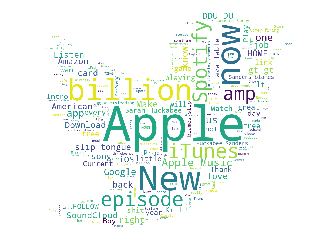

In [197]:
from scipy.misc import imread

twitter_mask = imread('images/twitter_mask.png', flatten=True)


wordcloud = WordCloud(
                      #font_path='fonts/cabin-sketch.bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('images/my_twitter_wordcloud_2.png', dpi=300)
plt.show()